In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_rec_trei = pd.read_csv('desafio_train.csv')
df_rec_test = pd.read_csv('desafio_test.csv')

In [3]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,...,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False


In [4]:
df_rec_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,...,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_rec_trei.shape

(11033, 63)

In [6]:
df_rec_test.shape

(1000, 62)

In [7]:
df_rec_trei[['target']].count()


target    11033
dtype: int64

In [8]:
#verificando os tipos
df_rec_trei.dtypes

id          int64
cnae2       int64
rf2        object
md1       float64
md2       float64
           ...   
ind40     float64
ind41     float64
ind42     float64
ind43     float64
target       bool
Length: 63, dtype: object

In [9]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [10]:
#função mostra isna

def mostra_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f != 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(),g))
    print('qt de colunas con isna:{}'.format(d))
    
    

In [11]:
#função mostra sem isna
def mostra_sem_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f == 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(), g))
    print('qt de colunas con isna:{}'.format(d))
    

    

check no df de teste

In [12]:
mostra_sem_isna(df_rec_test)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
qt de colunas con isna:16


In [13]:
mostra_isna(df_rec_test)

mc1 = 45: float64
mc2 = 45: float64
mc3 = 45: float64
ind01 = 4: float64
ind02 = 4: float64
ind03 = 4: float64
ind04 = 4: float64
ind05 = 4: float64
ind06 = 4: float64
ind07 = 4: float64
ind08 = 4: float64
ind09 = 4: float64
ind10 = 4: float64
ind11 = 4: float64
ind12 = 4: float64
ind13 = 4: float64
ind14 = 4: float64
ind15 = 4: float64
ind16 = 4: float64
ind17 = 4: float64
ind18 = 4: float64
ind19 = 4: float64
ind20 = 4: float64
ind21 = 43: float64
ind22 = 43: float64
ind23 = 43: float64
ind24 = 43: float64
ind25 = 43: float64
ind26 = 43: float64
ind27 = 43: float64
ind28 = 4: float64
ind29 = 4: float64
ind30 = 4: float64
ind31 = 4: float64
ind32 = 4: float64
ind33 = 4: float64
ind34 = 4: float64
ind35 = 4: float64
ind36 = 4: float64
ind37 = 4: float64
ind38 = 43: float64
ind39 = 43: float64
ind40 = 4: float64
ind41 = 4: float64
ind42 = 43: float64
ind43 = 43: float64
qt de colunas con isna:46


Inicio do tratamento do df de treino

In [14]:
#16 coluna sem isna
mostra_sem_isna(df_rec_trei)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
target = 0: bool
qt de colunas con isna:17


In [15]:
#46 colunas com isna
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind01 = 34: float64
ind02 = 34: float64
ind03 = 34: float64
ind04 = 34: float64
ind05 = 34: float64
ind06 = 34: float64
ind07 = 34: float64
ind08 = 34: float64
ind09 = 34: float64
ind10 = 34: float64
ind11 = 34: float64
ind12 = 34: float64
ind13 = 34: float64
ind14 = 34: float64
ind15 = 34: float64
ind16 = 34: float64
ind17 = 34: float64
ind18 = 34: float64
ind19 = 34: float64
ind20 = 34: float64
ind21 = 599: float64
ind22 = 599: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind26 = 599: float64
ind27 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind33 = 34: float64
ind34 = 34: float64
ind35 = 34: float64
ind36 = 34: float64
ind37 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:46


In [16]:
#converte a target para True = 1 e False = 0
df_rec_trei['target_c'] = df_rec_trei[['target']].astype(int)

In [39]:
df_rec_trei

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,...,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target_c
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,s,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11029,12027,49,v,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11030,12030,47,y,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11031,12031,47,p,0.000021,0.001821,0.109838,0.002524,0.002524,0.0,0.013650,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [108]:
df2 = df_rec_trei[['target_c']]

In [109]:
df2.value_counts()

target_c
0           8513
1           2520
dtype: int64

In [110]:
a = df2.value_counts()
b = df2.value_counts()[0]/df2.shape[0]
c = df2.value_counts()[1]/df2.shape[0]
d = df2.shape[0]
print('Elementos:\n{}, Qtd:\n{}, percentual:\n{}, percentual:\n{}'.format(a,d,b,c))




Elementos:
target_c
0           8513
1           2520
dtype: int64, Qtd:
11033, percentual:
target_c
0           0.771594
dtype: float64, percentual:
target_c
1           0.228406
dtype: float64


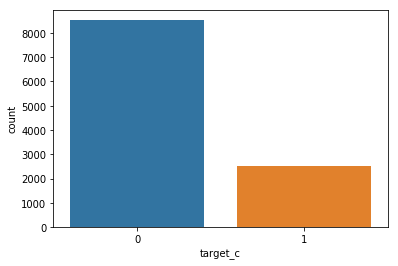

In [111]:
sns.countplot( x = 'target_c', data = df2)

In [80]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target_c'],
      dtype='object')

In [141]:
l_rec_trei_ind01_20 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']
l_rec_trei_ind21_43 =[ 'ind22']

In [101]:
l_2 =[ 'ind01']

In [82]:
df3 = df_rec_trei[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']]

In [84]:
df3.describe()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.106722,0.157427,0.346646,0.364934,0.378858,0.397906,0.305112,0.355596,0.007454,0.001375,0.001093,0.141280,0.170552,0.034556,0.019556,0.003789,0.014774,0.004045,0.694791,0.700189
std,0.305922,0.315114,0.470182,0.451587,0.449015,0.473002,0.430549,0.440732,0.069064,0.031814,0.029262,0.312289,0.322844,0.161135,0.129848,0.059799,0.118014,0.062567,0.452090,0.450725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.083300,1.000000,1.000000,1.000000,1.000000,0.862600,0.932700,0.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


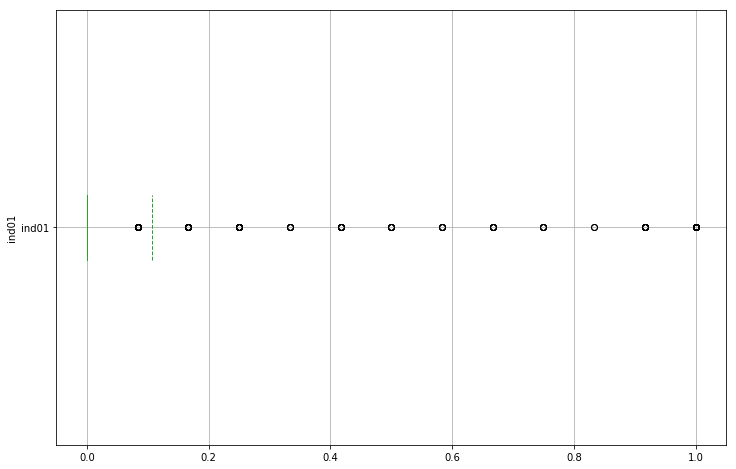

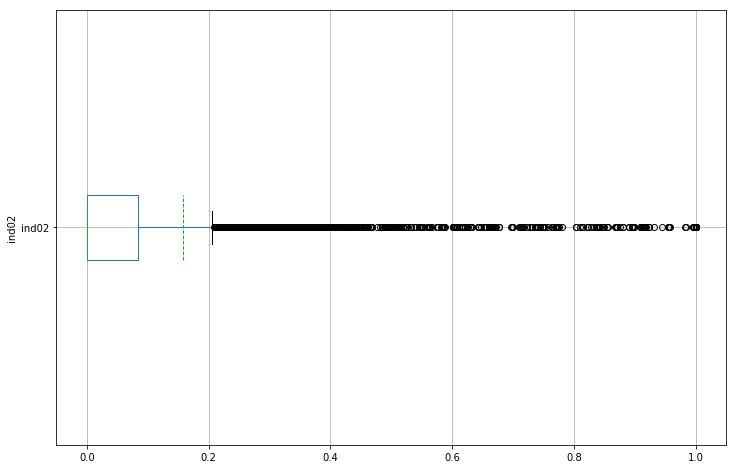

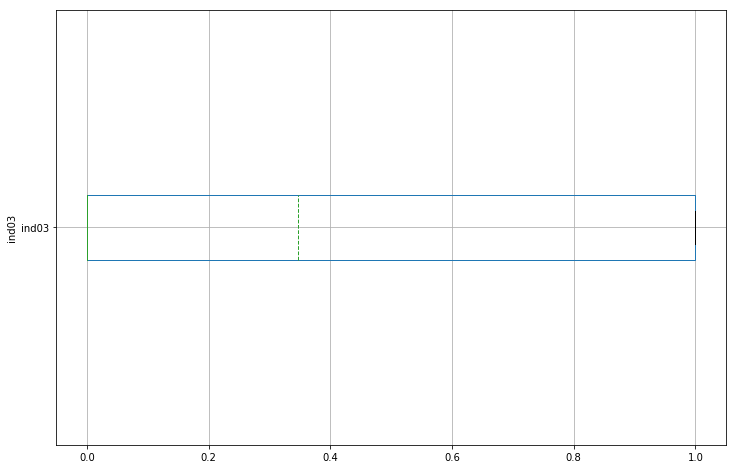

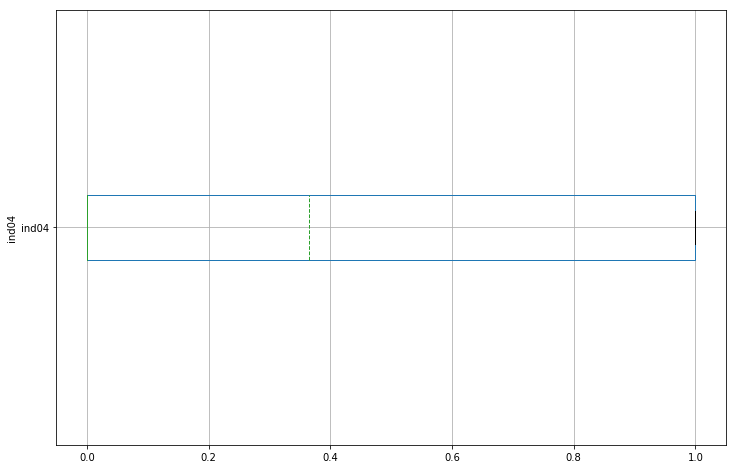

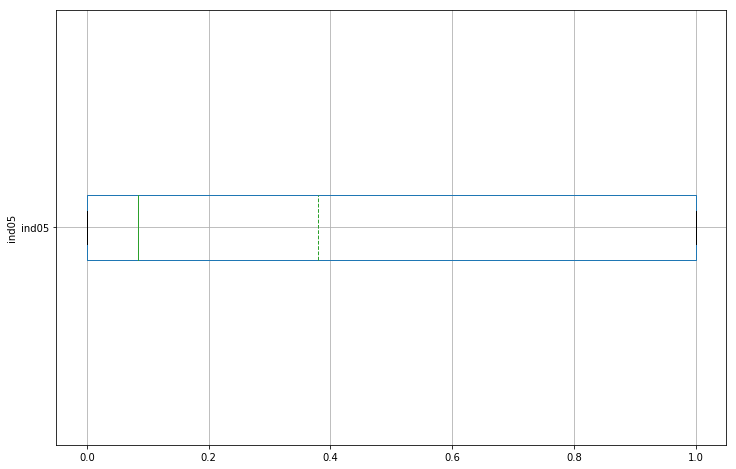

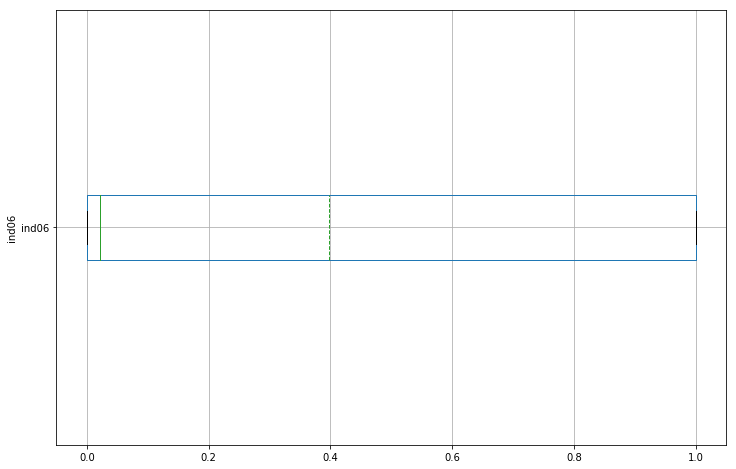

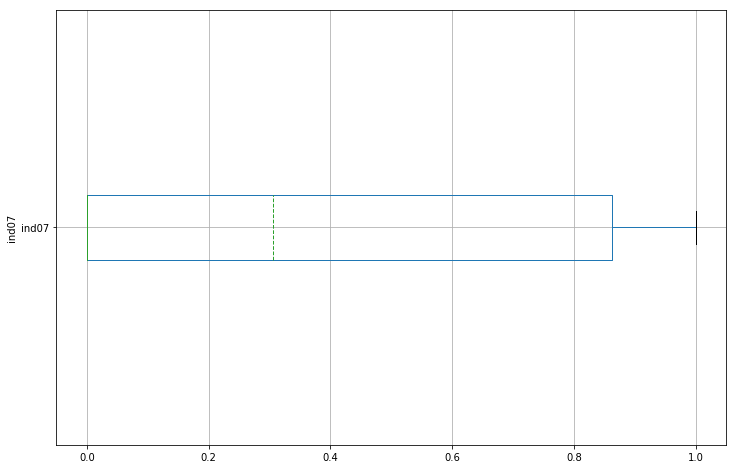

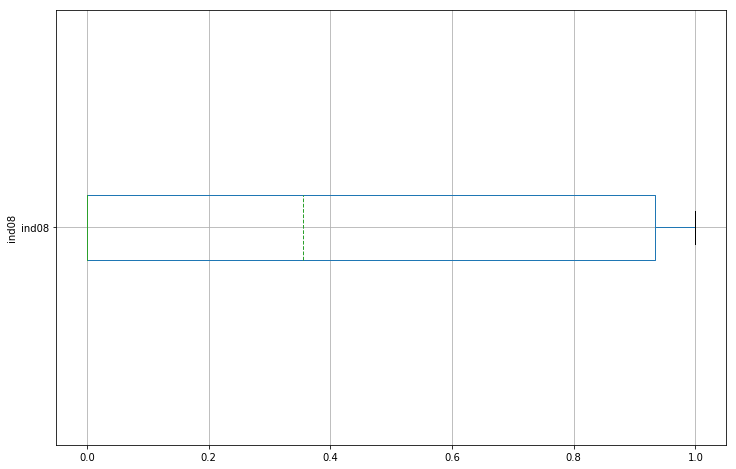

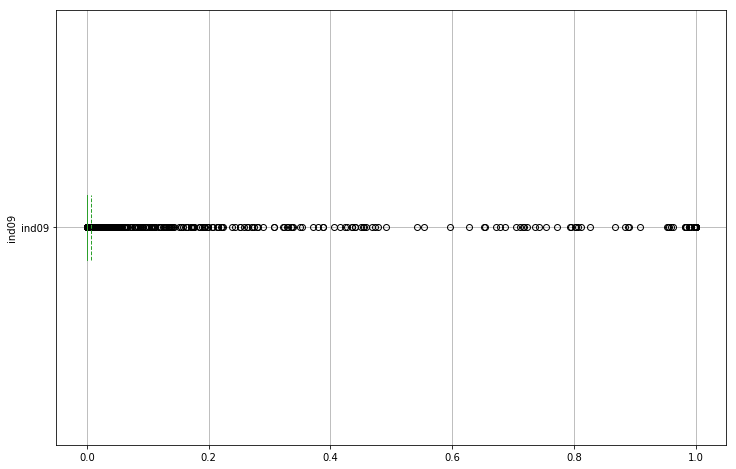

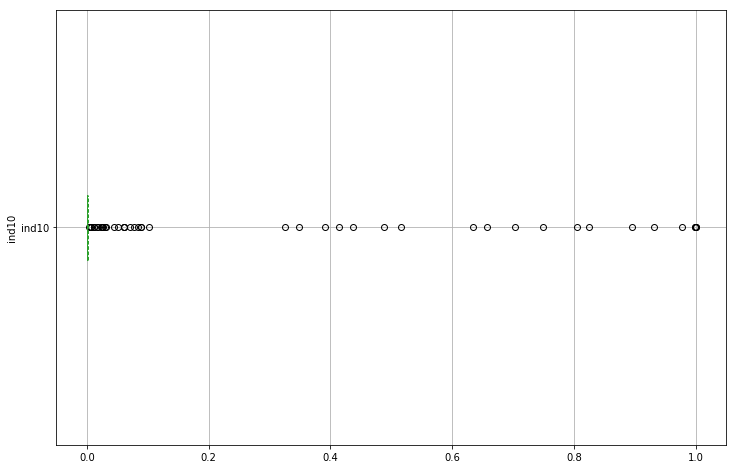

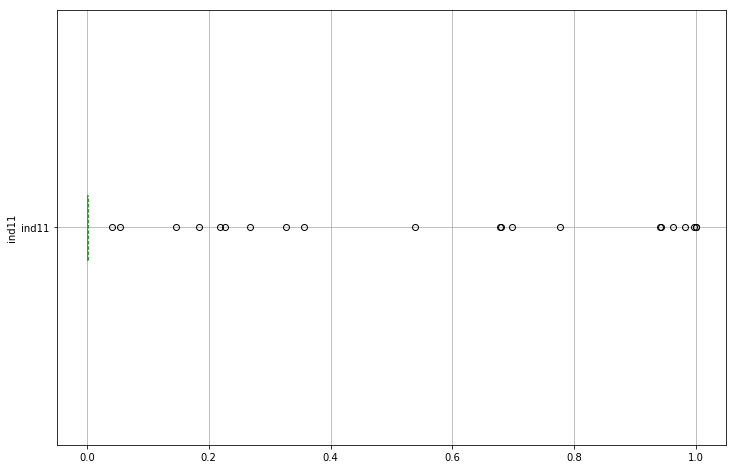

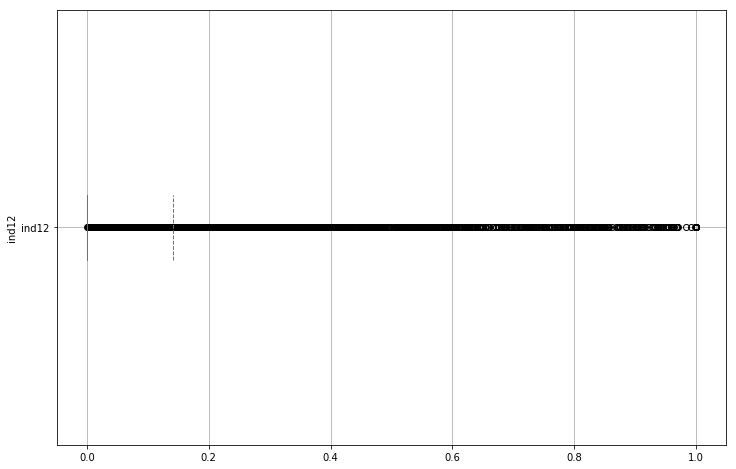

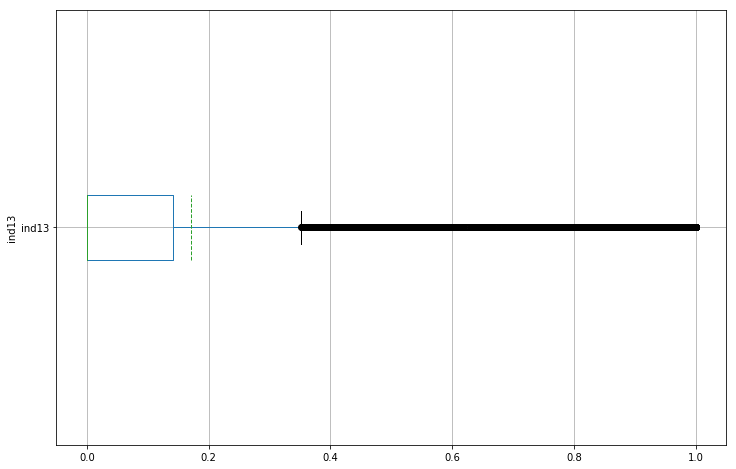

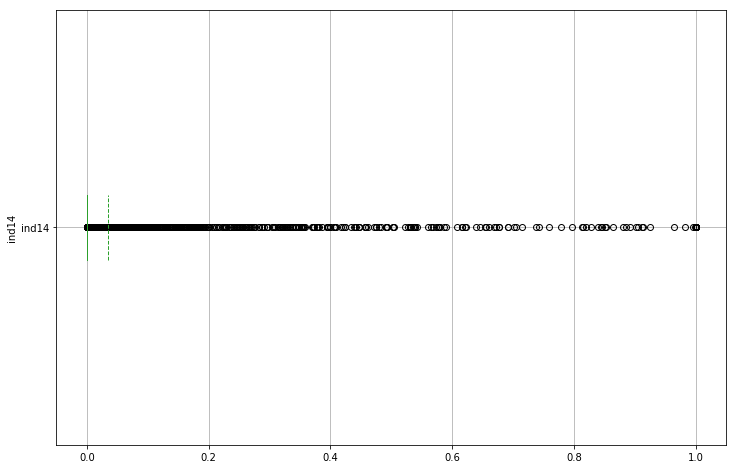

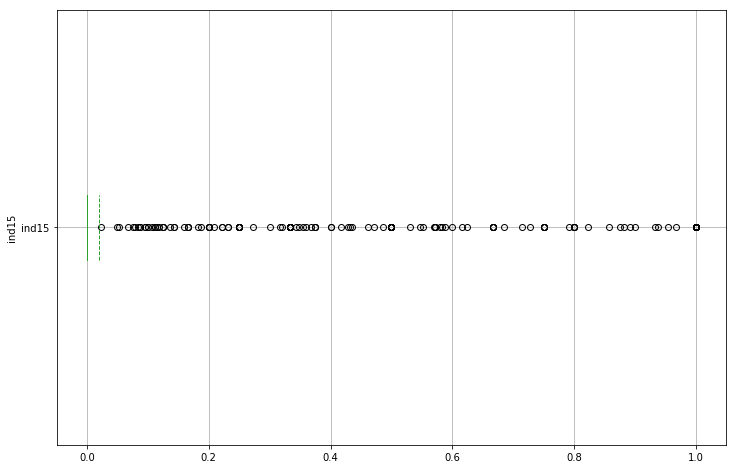

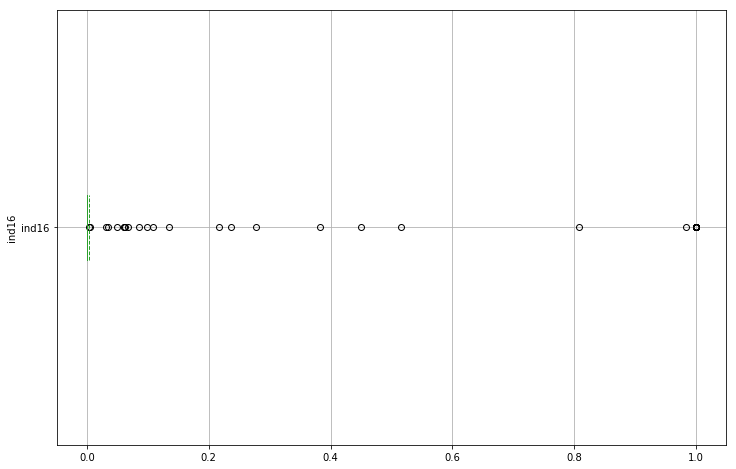

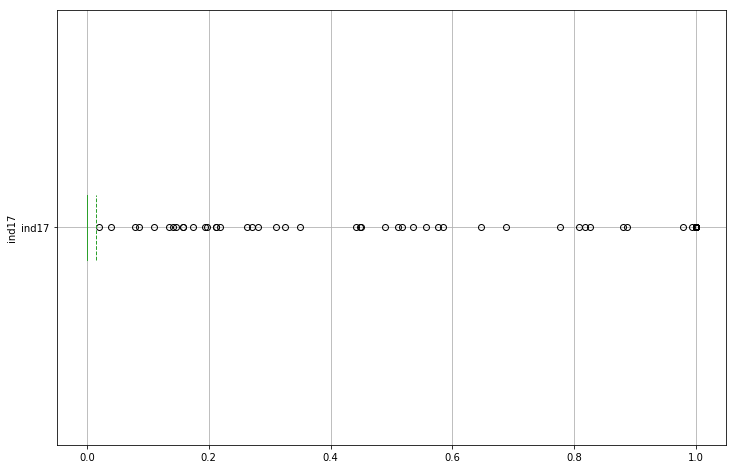

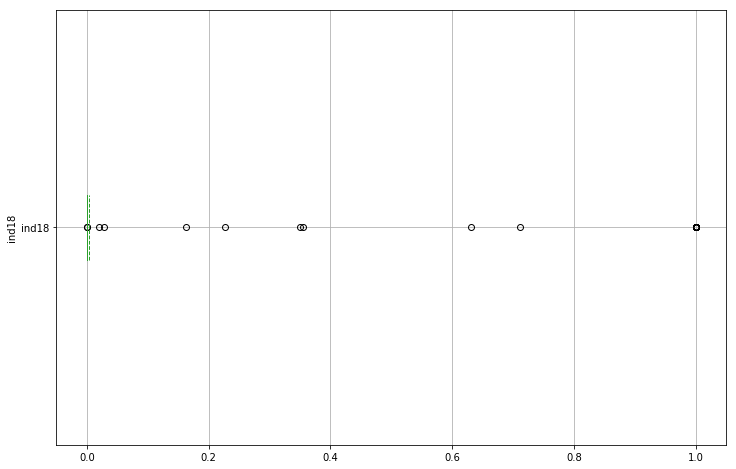

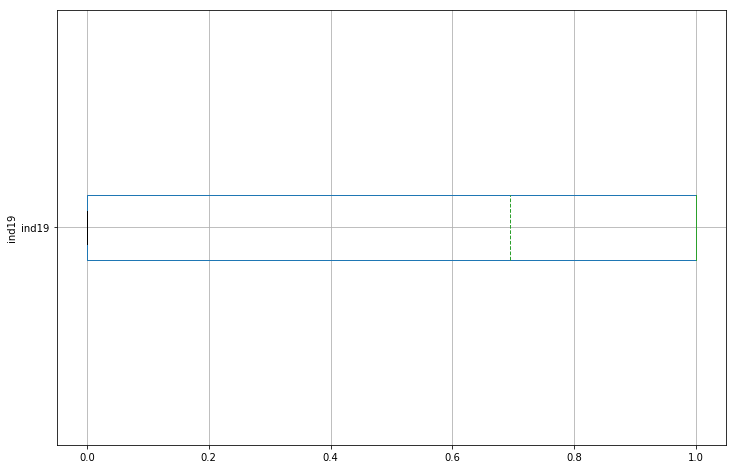

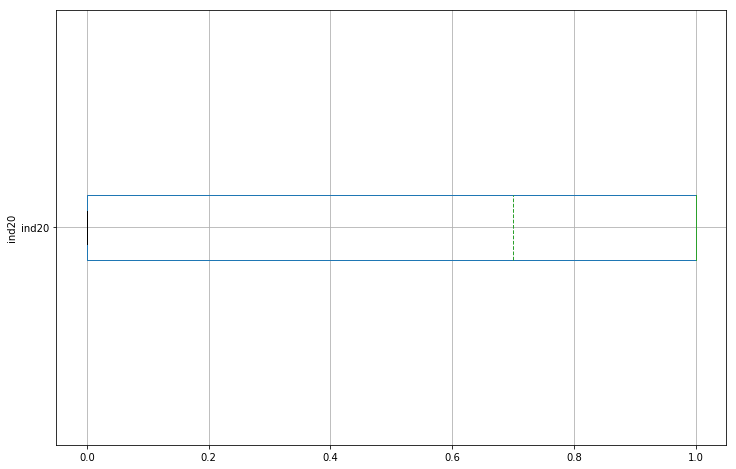

In [134]:
#ANTES DE TRATAR missing
#outliers dos ind01 a ind20
for d in l_rec_trei_ind01_20:
    df3[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [125]:
print('median:\n{}, \nmean:\n{},\nmedian:\n{},\nstd:\n{}'.format(df3.median(), df3.mean(), df3.mode(), df3.std()))

median:
ind01    0.0000
ind02    0.0000
ind03    0.0000
ind04    0.0000
ind05    0.0833
ind06    0.0219
ind07    0.0000
ind08    0.0000
ind09    0.0000
ind10    0.0000
ind11    0.0000
ind12    0.0000
ind13    0.0000
ind14    0.0000
ind15    0.0000
ind16    0.0000
ind17    0.0000
ind18    0.0000
ind19    1.0000
ind20    1.0000
dtype: float64, 
mean:
ind01    0.106722
ind02    0.157427
ind03    0.346646
ind04    0.364934
ind05    0.378858
ind06    0.397906
ind07    0.305112
ind08    0.355596
ind09    0.007454
ind10    0.001375
ind11    0.001093
ind12    0.141280
ind13    0.170552
ind14    0.034556
ind15    0.019556
ind16    0.003789
ind17    0.014774
ind18    0.004045
ind19    0.694791
ind20    0.700189
dtype: float64,
median:
   ind01  ind02  ind03  ind04  ind05  ind06  ind07  ind08  ind09  ind10  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ind11  ind12  ind13  ind14  ind15  ind16  ind17  ind18  ind19  ind20  
0    0.0    0.0    0.0    0.0    0.0    

In [143]:
#missing values
from sklearn.impute import SimpleImputer

# fit()
imputer_mv = SimpleImputer(strategy = 'mean')
imputer_mv.fit(df3[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']])

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

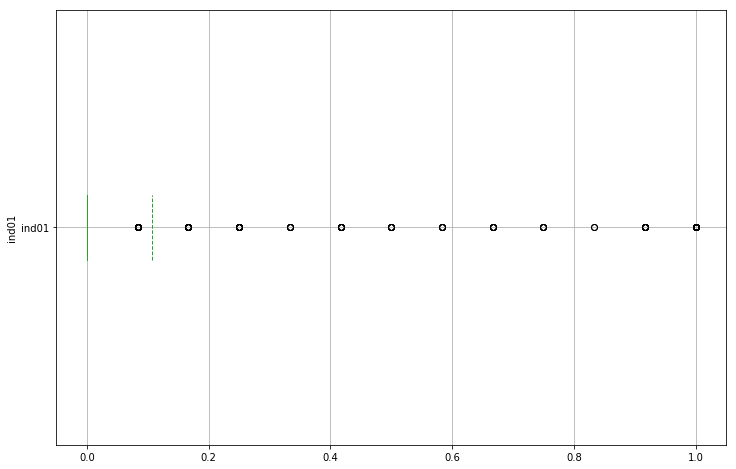

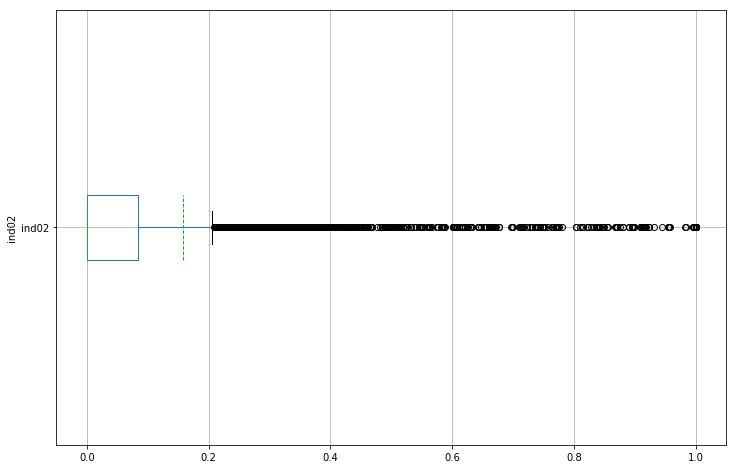

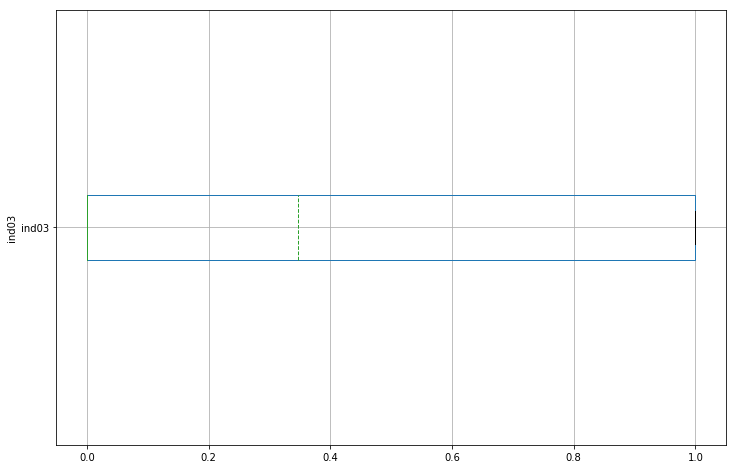

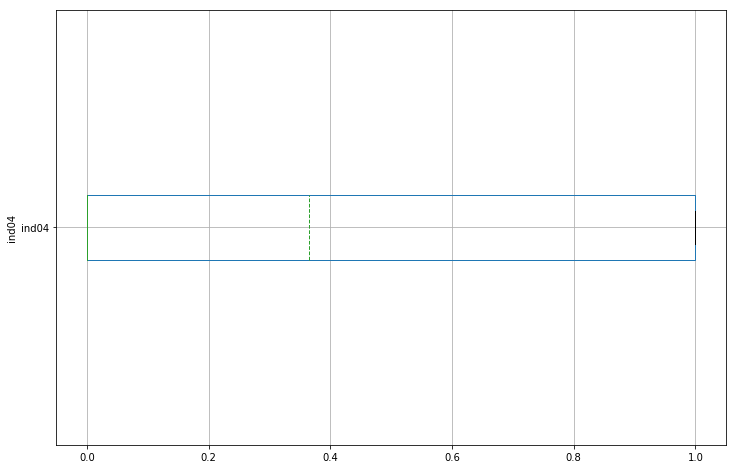

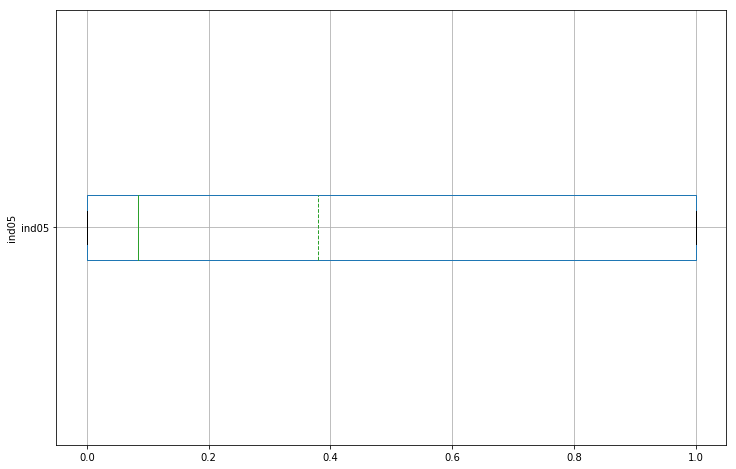

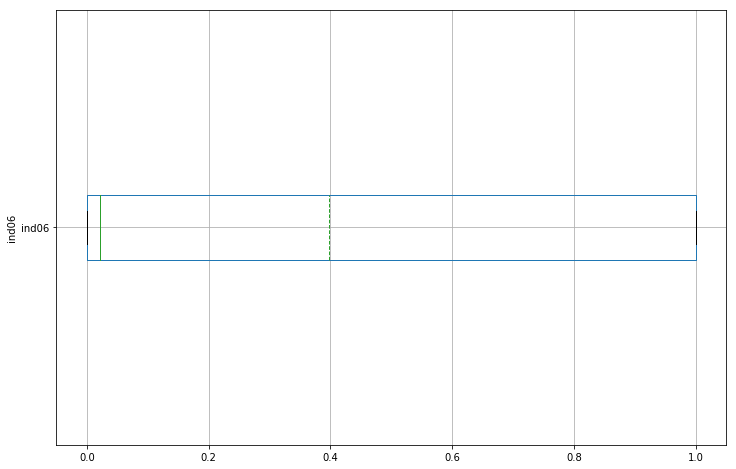

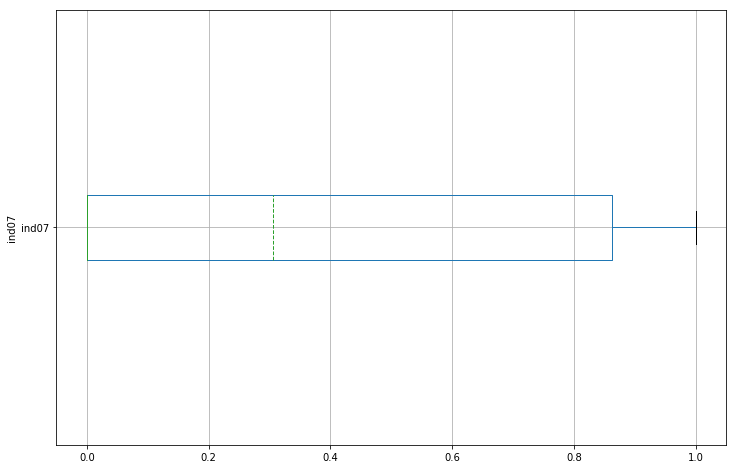

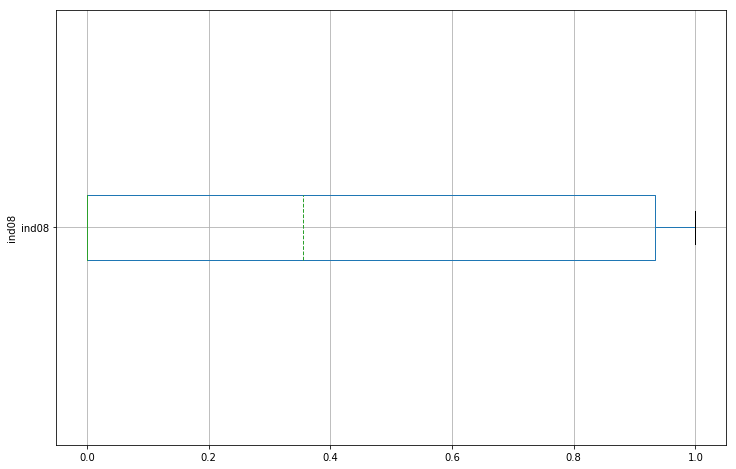

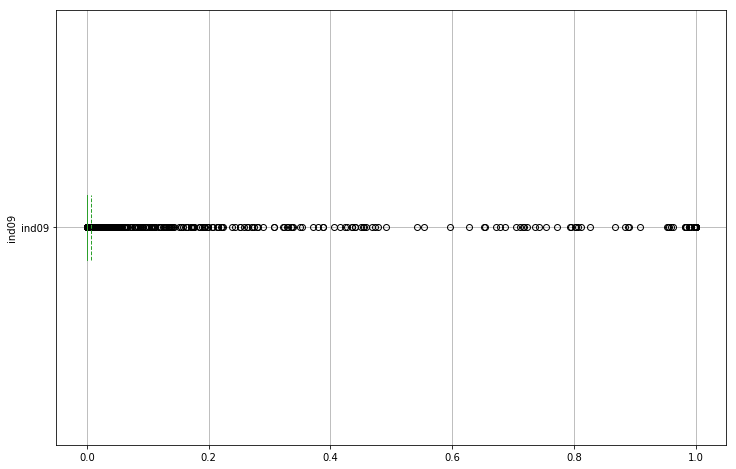

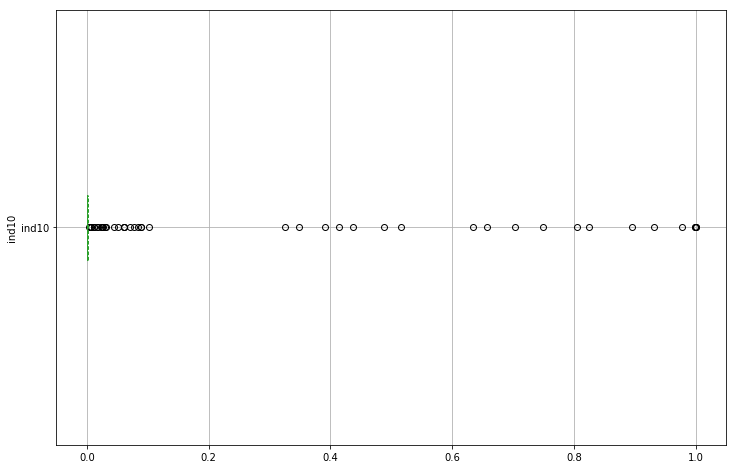

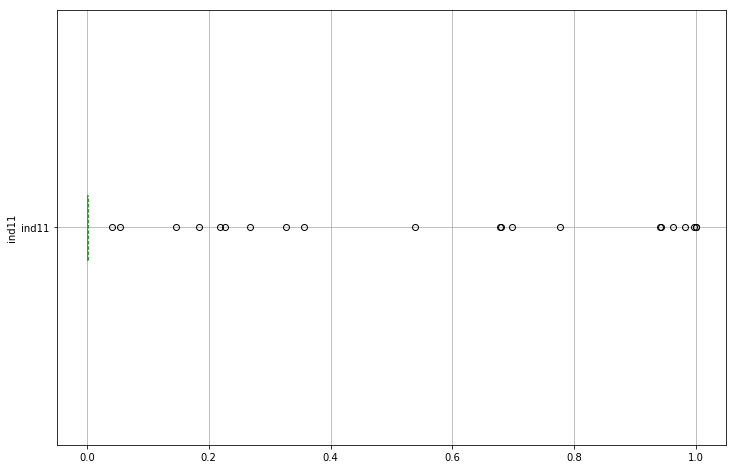

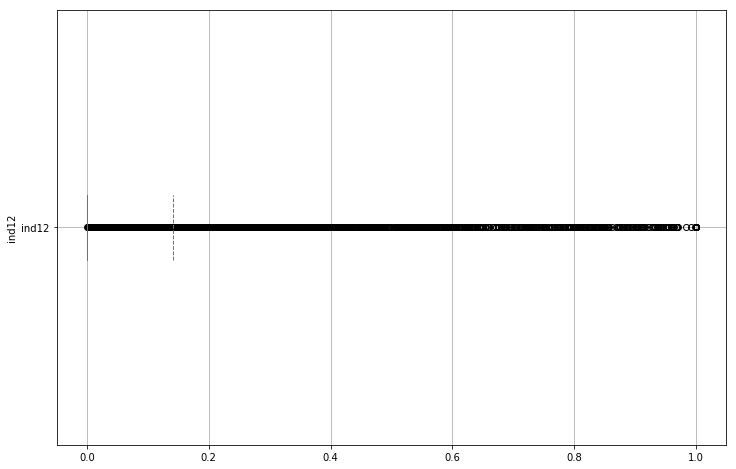

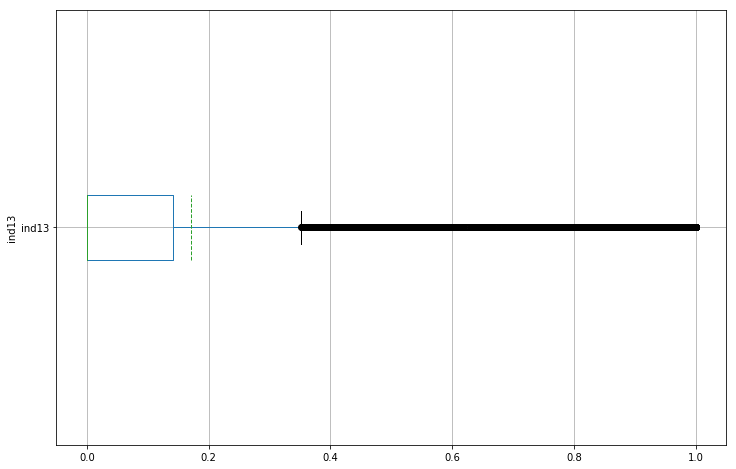

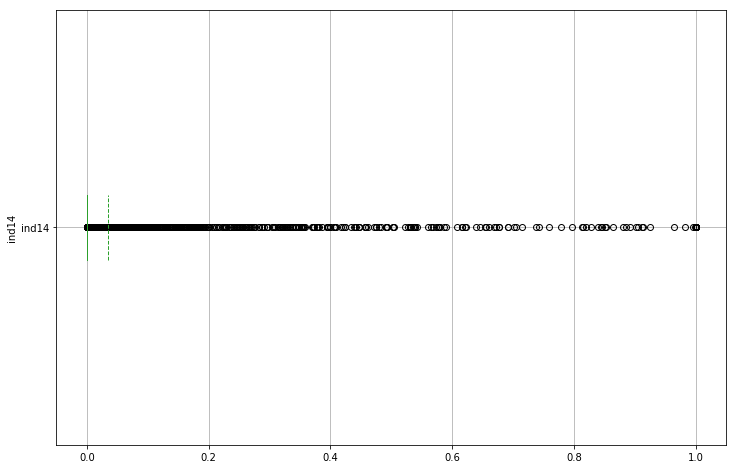

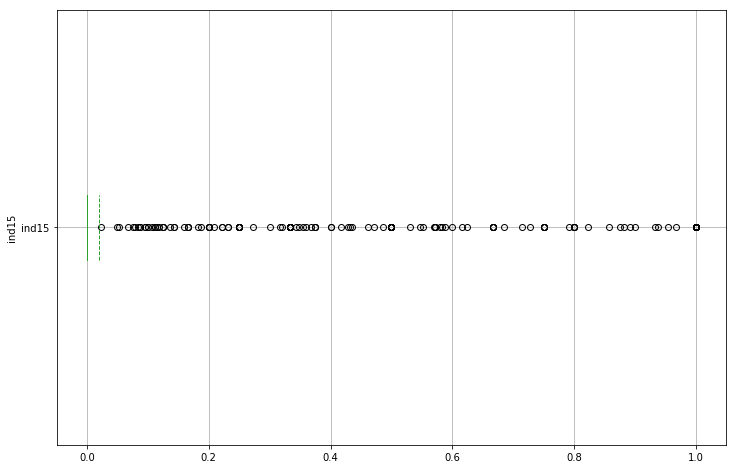

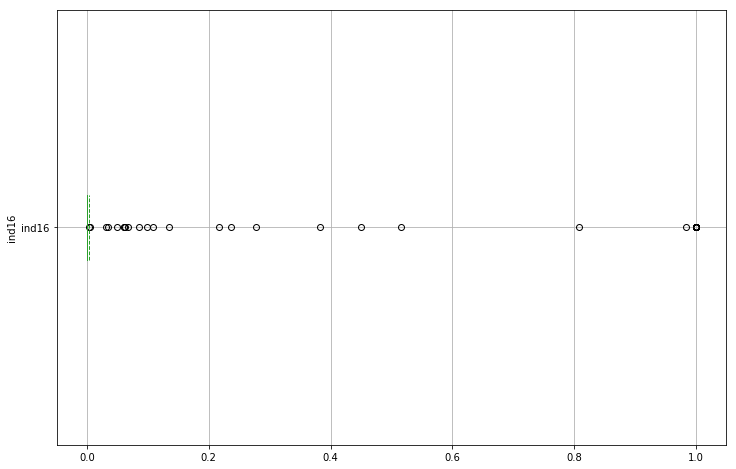

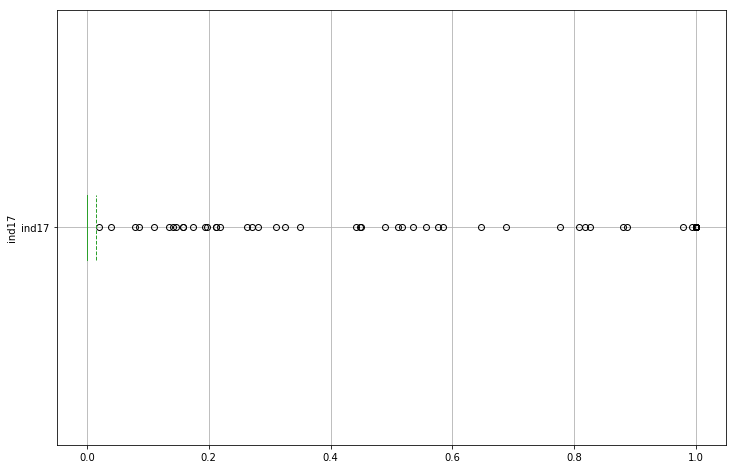

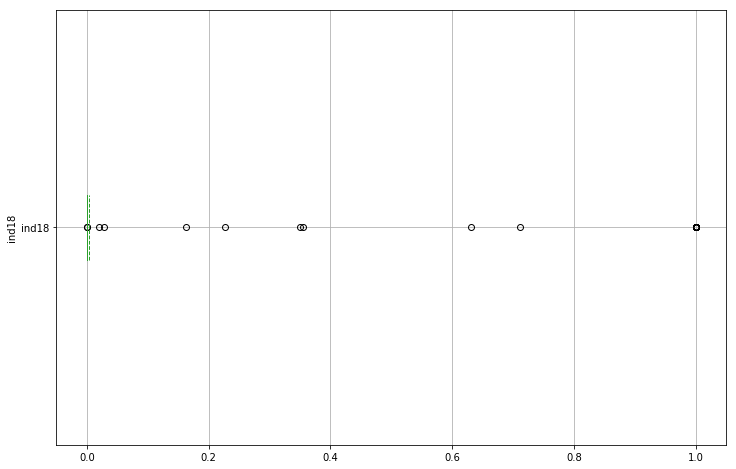

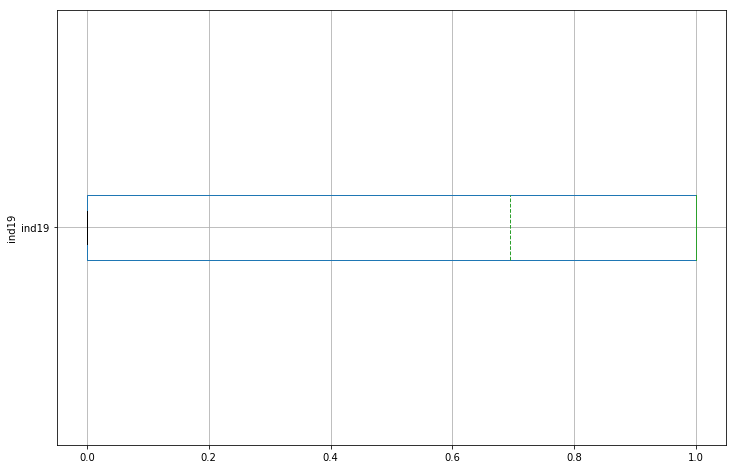

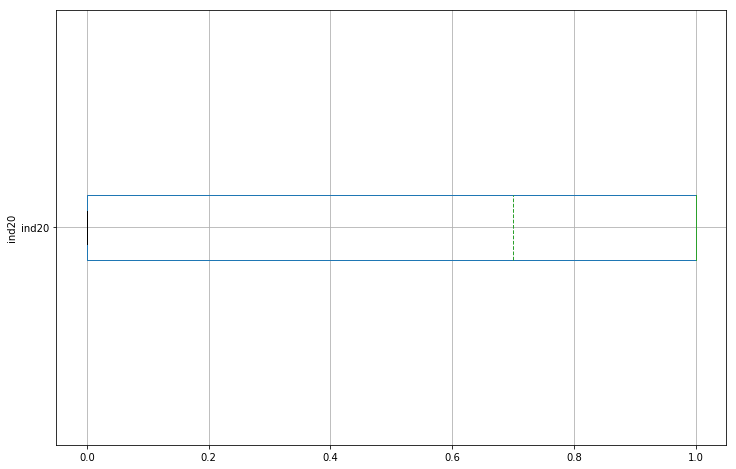

In [144]:
#DEPOIS DE TRATAR missing
#outliers dos ind01 a ind20
for d in l_rec_trei_ind01_20:
    df3[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [104]:
df2 = df_rec_trei['ind02']
df2.describe()

count    10999.000000
mean         0.157427
std          0.315114
min          0.000000
25%          0.000000
50%          0.000000
75%          0.083300
max          1.000000
Name: ind02, dtype: float64

In [ ]:
df3

In [38]:
df2.describe()

,target_c
count,11033.000000
mean,0.228406
std,0.419824
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
df2.shape[0]

11033

In [18]:
#drop da coluna targer (True e False)
#tendo a coluna 'target_c' como resultado
df_rec_trei.drop(columns = 'target', inplace = True)

In [19]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,...,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target_c
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0


In [20]:
l_rec_trei = df_rec_trei.columns
l_col_isna_trei = []

for i in l_rec_trei:
    f = df_rec_trei[i].isna().sum()
    if f != 0:
        l_col_isna_trei.append(i)
           

In [21]:
l_col_isna_trei

['mc1',
 'mc2',
 'mc3',
 'ind01',
 'ind02',
 'ind03',
 'ind04',
 'ind05',
 'ind06',
 'ind07',
 'ind08',
 'ind09',
 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18',
 'ind19',
 'ind20',
 'ind21',
 'ind22',
 'ind23',
 'ind24',
 'ind25',
 'ind26',
 'ind27',
 'ind28',
 'ind29',
 'ind30',
 'ind31',
 'ind32',
 'ind33',
 'ind34',
 'ind35',
 'ind36',
 'ind37',
 'ind38',
 'ind39',
 'ind40',
 'ind41',
 'ind42',
 'ind43']

In [22]:
df_rec_trei['ind01'].isna().sum()

34

In [23]:
# 0- 9727; 1 - 1133; nan - 34; outros - 139 (173 = 139+34)

df_rec_trei[(df_rec_trei['ind01']!= 1)&(df_rec_trei['ind01']!= 0)].index

Int64Index([   64,   120,   259,   294,   552,   585,   647,   697,   730,
              803,
            ...
            10397, 10503, 10681, 10706, 10725, 10740, 10760, 10887, 10906,
            10996],
           dtype='int64', length=173)

In [24]:
l_ind01 = list(df_rec_trei[(df_rec_trei['ind01']!= 1)&(df_rec_trei['ind01']!= 0)].index)

In [25]:
for c in l_ind01:
    print(df_rec_trei[['ind01']].iloc[c:c+1,])

     ind01
64  0.6667
      ind01
120  0.0833
      ind01
259  0.5833
      ind01
294  0.1667
      ind01
552  0.0833
      ind01
585  0.8333
     ind01
647   0.25
      ind01
697  0.5833
     ind01
730    NaN
     ind01
803    NaN
      ind01
832  0.1667
     ind01
920    NaN
      ind01
945  0.3333
      ind01
961  0.1667
      ind01
1011    NaN
       ind01
1056  0.0833
       ind01
1064  0.0833
      ind01
1159   0.75
      ind01
1213    NaN
      ind01
1224    NaN
      ind01
1303    NaN
      ind01
1308    0.5
       ind01
1423  0.9167
       ind01
1468  0.0833
      ind01
1472   0.25
       ind01
1556  0.0833
       ind01
1610  0.9167
       ind01
1653  0.0833
      ind01
1684    NaN
       ind01
1691  0.0833
       ind01
1774  0.1667
       ind01
1783  0.0833
       ind01
2032  0.1667
      ind01
2062    NaN
       ind01
2149  0.1667
       ind01
2259  0.0833
       ind01
2283  0.0833
      ind01
2312    NaN
       ind01
2334  0.0833
      ind01
2399   0.25
      ind01
2481    

In [26]:
df_rec_trei[df_rec_trei['ind01'].isna()].index

Int64Index([  730,   803,   920,  1011,  1213,  1224,  1303,  1684,  2062,
             2312,  2481,  2538,  2847,  3233,  3772,  3883,  4297,  4707,
             5148,  5180,  5346,  5492,  5689,  6101,  6823,  7297,  7862,
             8893,  9434,  9800, 10213, 10280, 10283, 10887],
           dtype='int64')

In [27]:
df_rec_trei[df_rec_trei['ind01']== 0].index

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,     9,
               10,
            ...
            11020, 11021, 11023, 11024, 11025, 11026, 11027, 11029, 11031,
            11032],
           dtype='int64', length=9727)

In [28]:
df_rec_trei[df_rec_trei['ind01']== 1].index

Int64Index([    5,    11,    24,    27,    32,    37,    47,    87,    92,
               97,
            ...
            10941, 10955, 10978, 10986, 10991, 11003, 11007, 11022, 11028,
            11030],
           dtype='int64', length=1133)

In [29]:
df_rec_trei[['ind01']].iloc[64:65,]

,ind01
64,0.6667


In [30]:
df1 = df_rec_trei[['ind01']]

In [31]:
df1

,ind01
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
11028,1.0
11029,0.0
11030,1.0
11031,0.0


In [94]:
mostra_missing_value(df1)

       Total  Percentual
ind01     34         0.0
